In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

print  ("Nguyễn Viết Ái Nhi - 6351071054")
data = pd.read_csv('/content/mushrooms.csv')
X = data.drop('class', axis=1)
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
print("Số lượng dữ liệu huấn luyện:", X_train.shape[0])
print("Số lượng dữ liệu kiểm thử:", X_test.shape[0])

data = data.dropna()

# Kiểm tra thông tin dữ liệu sau tiền xử lý
print("Số lượng dòng dữ liệu sau khi xóa trống:", len(data))
data.info()

Nguyễn Viết Ái Nhi - 6351071054
Số lượng dữ liệu huấn luyện: 5686
Số lượng dữ liệu kiểm thử: 2438
Số lượng dòng dữ liệu sau khi xóa trống: 8124
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   

Nguyễn Viết Ái Nhi - 6351071054


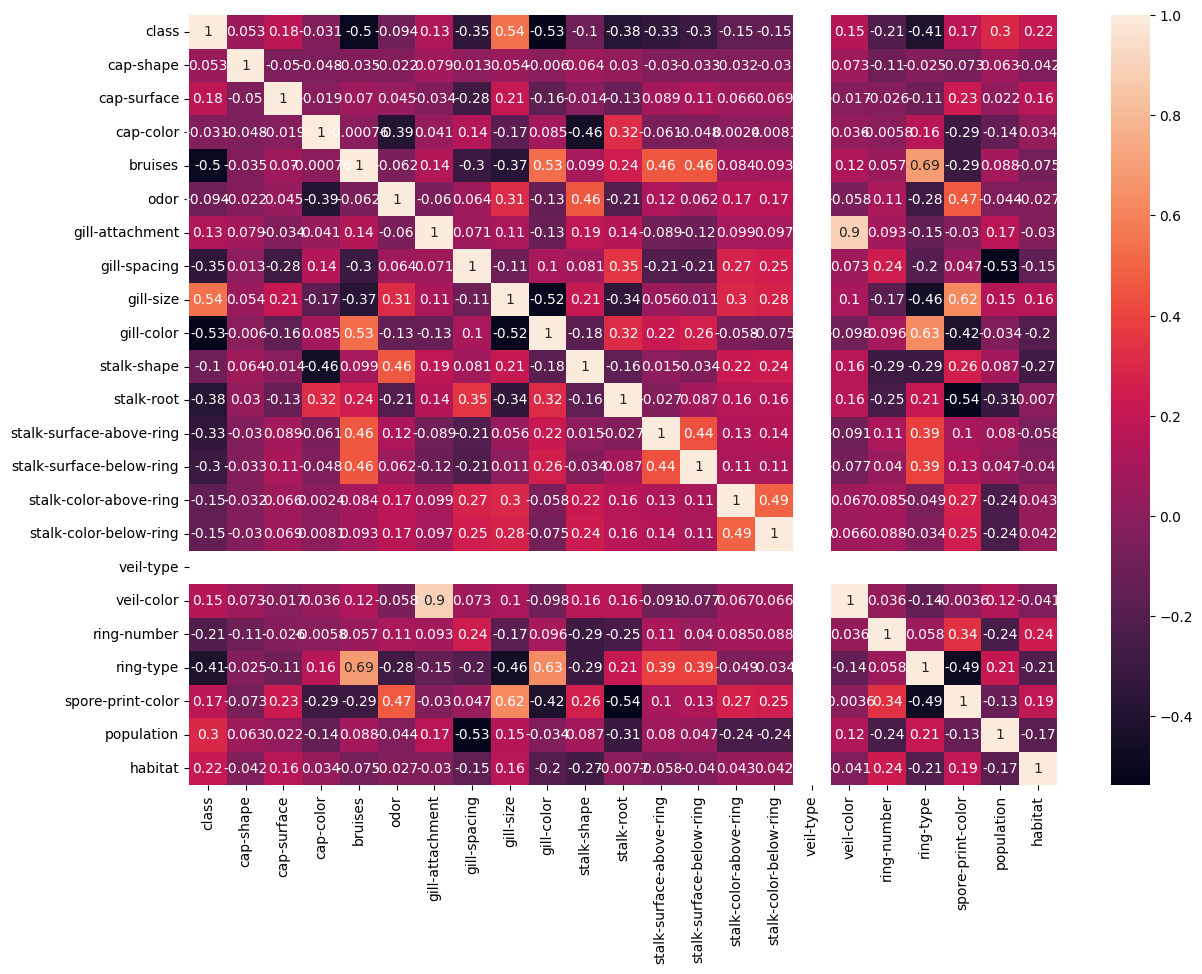

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Nguyễn Viết Ái Nhi - 6351071054")

from sklearn.preprocessing import LabelEncoder

data_encoded = data.copy()
for col in data_encoded.select_dtypes(include='object').columns:
    data_encoded[col] = LabelEncoder().fit_transform(data_encoded[col])

plt.figure(figsize=(14,10))
sns.heatmap(data_encoded.corr(), annot=True)
plt.show()

**Câu 4**

In [ ]:
print("Nguyễn Viết Ái Nhi - 6351071054")
features = data.drop('class', axis=1)
labels = data['class']

# --- Hiển thị thông tin sau khi tách ---
print("\n Kích thước features:", features.shape)
print(" Kích thước labels:", labels.shape)

print("\n Các cột trong FEATURES:")
print(features.columns.tolist())

print("\n Một vài dòng đầu của FEATURES:")
print(features.head())

print("\n Một vài dòng đầu của LABELS:")
print(labels.head())

Nguyễn Viết Ái Nhi - 6351071054

 Kích thước features: (8124, 22)
 Kích thước labels: (8124,)

 Các cột trong FEATURES:
['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']

 Một vài dòng đầu của FEATURES:
  cap-shape cap-surface cap-color bruises odor gill-attachment gill-spacing  \
0         x           s         n       t    p               f            c   
1         x           s         y       t    a               f            c   
2         b           s         w       t    l               f            c   
3         x           y         w       t    p               f            c   
4         x           s         g       f    n               f            w   

  gill-size

**Câu 5**

In [ ]:
print("Nguyễn Viết Ái Nhi - 6351071054")

# Lấy các cột categorical
categorical_cols = features.select_dtypes(exclude=['int64']).columns

# Hiển thị các cột này
print(categorical_cols)

Nguyễn Viết Ái Nhi - 6351071054
Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


In [ ]:
print("Nguyễn Viết Ái Nhi - 6351071054")
features_onehot = pd.get_dummies(features, columns=features.select_dtypes(exclude=['int64']).columns)
features_onehot


Nguyễn Viết Ái Nhi - 6351071054


,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,False,True,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,True,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
8120,False,False,False,False,False,True,False,False,True,False,...,False,True,False,False,False,True,False,False,False,False
8121,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
8122,False,False,False,True,False,False,False,False,False,True,...,False,True,False,False,False,True,False,False,False,False


**Câu 6**

In [ ]:
from sklearn.model_selection import train_test_split


print("Nguyễn Viết Ái Nhi - 6351071054")

# Chia dữ liệu train/test
X_train, X_test, y_train, y_test = train_test_split(
    features, labels,
    test_size=0.30,
    random_state=0
)

print(X_train.shape, X_test.shape)


Nguyễn Viết Ái Nhi - 6351071054
(5686, 22) (2438, 22)


**Câu 7**

In [ ]:
print("Nguyễn Viết Ái Nhi - 6351071054")

# Danh sách các cột dạng object
categorical_cols = [
    'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
    'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
    'stalk-surface-below-ring', 'stalk-color-above-ring',
    'stalk-color-below-ring', 'veil-type', 'veil-color',
    'ring-number', 'ring-type', 'spore-print-color',
    'population', 'habitat'
]

# One-hot encoding đúng tất cả cột object
features_onehot = pd.get_dummies(features, columns=categorical_cols)

# Train ID3
from sklearn import tree
clf_id3 = tree.DecisionTreeClassifier(criterion="entropy", random_state=0)
clf_id3.fit(X_train, y_train)
print(clf_id3.get_params())


Nguyễn Viết Ái Nhi - 6351071054
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 0, 'splitter': 'best'}


In [ ]:
from sklearn import metrics

# Dự đoán trên tập test
tree_pred_id3 = clf_id3.predict(X_test)

# Accuracy và báo cáo phân loại
tree_score_id3 = metrics.accuracy_score(y_test, tree_pred_id3)
print("Nguyễn Viết Ái Nhi - 6351071054")
print("ID3 Accuracy:", tree_score_id3)
print("ID3 Report:\n", metrics.classification_report(y_test, tree_pred_id3))


Nguyễn Viết Ái Nhi - 6351071054
ID3 Accuracy: 1.0
ID3 Report:
               precision    recall  f1-score   support

           e       1.00      1.00      1.00      1061
           p       1.00      1.00      1.00       970

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



Nguyễn Viết Ái Nhi - 6351071054


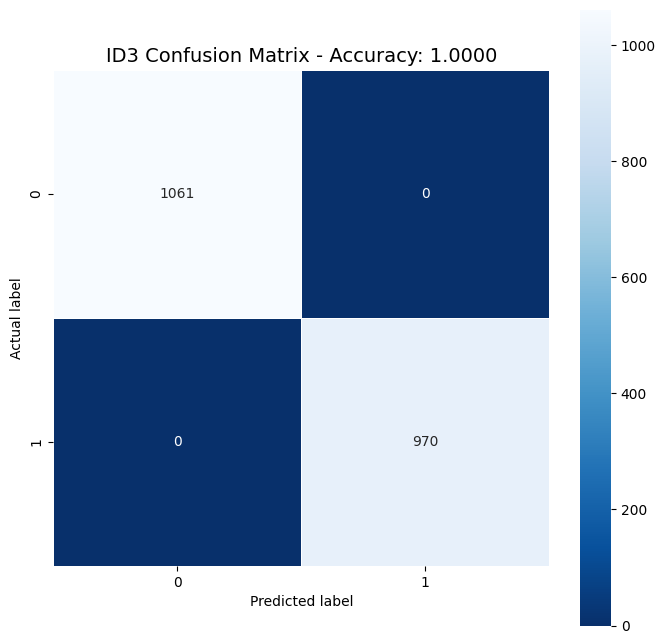

In [ ]:
import matplotlib.pyplot as plt

# Ma trận nhầm lẫn
tree_cm = metrics.confusion_matrix(y_test, tree_pred_id3)

print("Nguyễn Viết Ái Nhi - 6351071054")
plt.figure(figsize=(8,8))
sns.heatmap(tree_cm, annot=True, fmt="d", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title(f'ID3 Confusion Matrix - Accuracy: {tree_score_id3:.4f}', size=14)
plt.show()


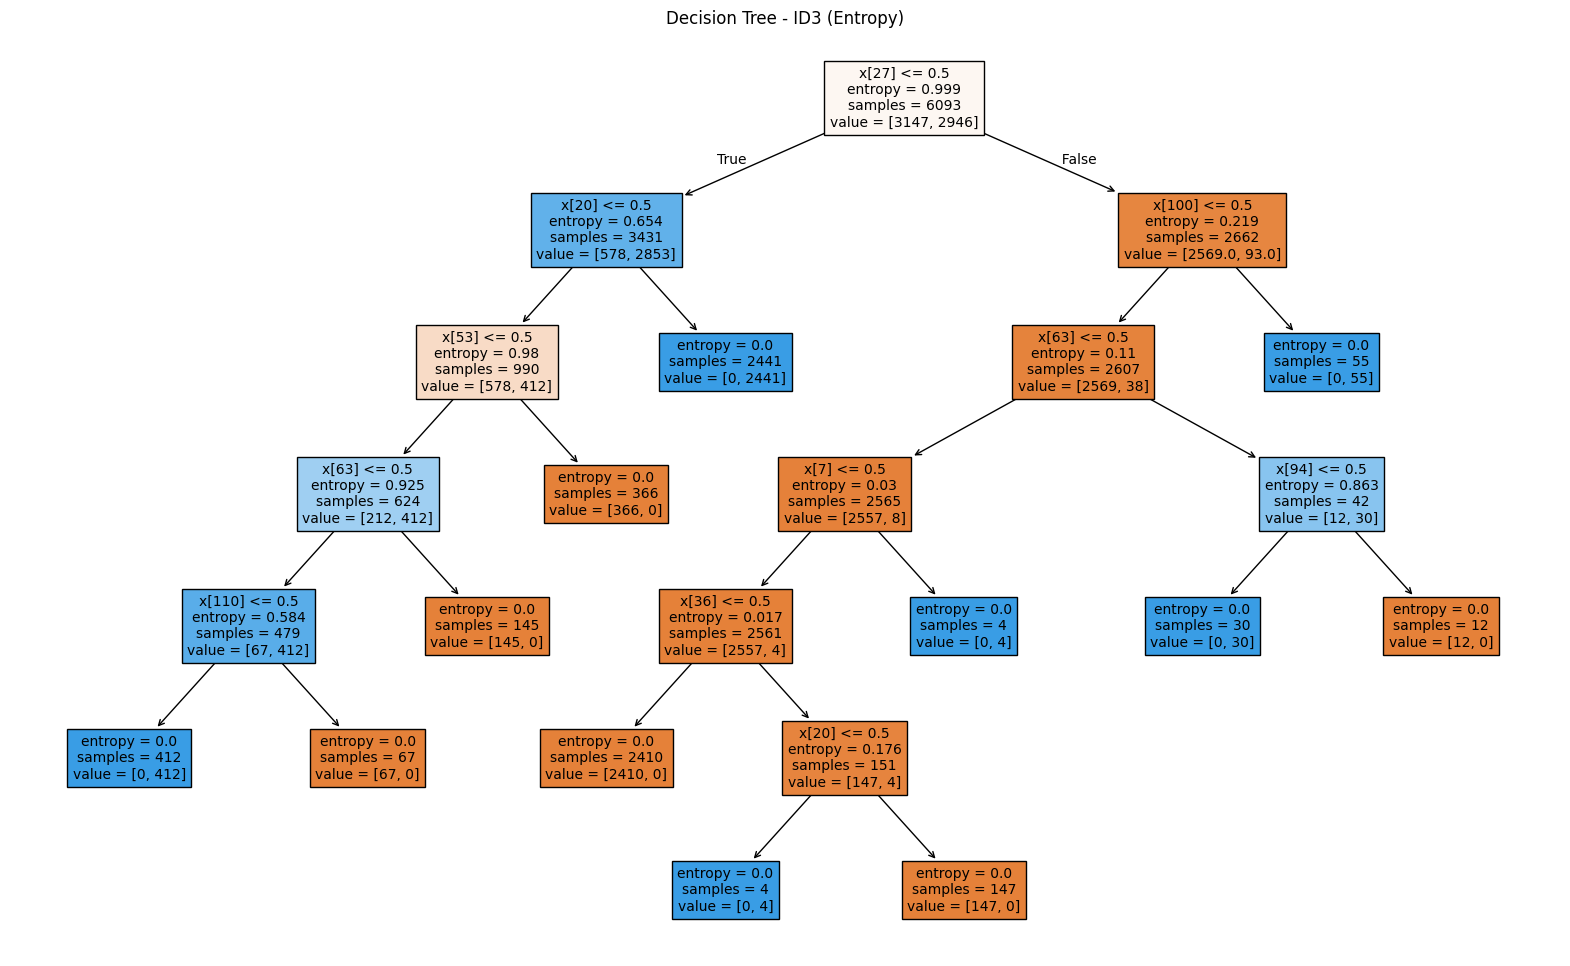

Nguyễn Viết Ái Nhi - 6351071054


In [ ]:
fig, ax = plt.subplots(figsize=(20,12))
tree.plot_tree(clf_id3, filled=True, fontsize=10)
plt.title("Decision Tree - ID3 (Entropy)")
plt.show()
print("Nguyễn Viết Ái Nhi - 6351071054")


**Câu 8**

In [ ]:

# Khởi tạo CART
clf_cart = tree.DecisionTreeClassifier(criterion="gini", random_state=0)

# Huấn luyện
clf_cart.fit(X_train, y_train)

print("Nguyễn Viết Ái Nhi - 6351071054")
print("CART Params:", clf_cart.get_params())


Nguyễn Viết Ái Nhi - 6351071054
CART Params: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 0, 'splitter': 'best'}


In [ ]:
from sklearn import metrics

# Dự đoán trên tập test
tree_pred_cart = clf_cart.predict(X_test)

# Accuracy và báo cáo phân loại
tree_score_cart = metrics.accuracy_score(y_test, tree_pred_cart)
print("Nguyễn Viết Ái Nhi - 6351071054")
print("CART Accuracy:", tree_score_cart)
print("CART Report:\n", metrics.classification_report(y_test, tree_pred_cart))


Nguyễn Viết Ái Nhi - 6351071054
CART Accuracy: 1.0
CART Report:
               precision    recall  f1-score   support

           e       1.00      1.00      1.00      1061
           p       1.00      1.00      1.00       970

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



Nguyễn Viết Ái Nhi - 6351071054


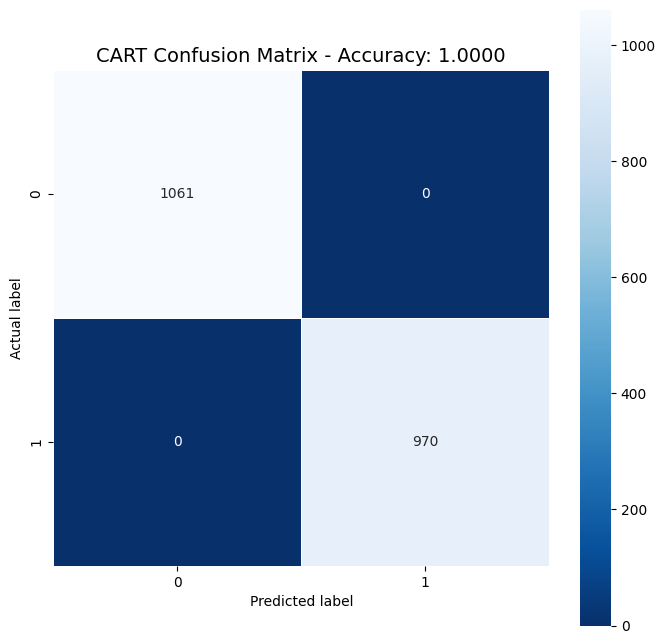

In [ ]:

# Ma trận nhầm lẫn
tree_cm_cart = metrics.confusion_matrix(y_test, tree_pred_cart)

print("Nguyễn Viết Ái Nhi - 6351071054")
plt.figure(figsize=(8,8))
sns.heatmap(tree_cm_cart, annot=True, fmt="d", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title(f'CART Confusion Matrix - Accuracy: {tree_score_cart:.4f}', size=14)
plt.show()


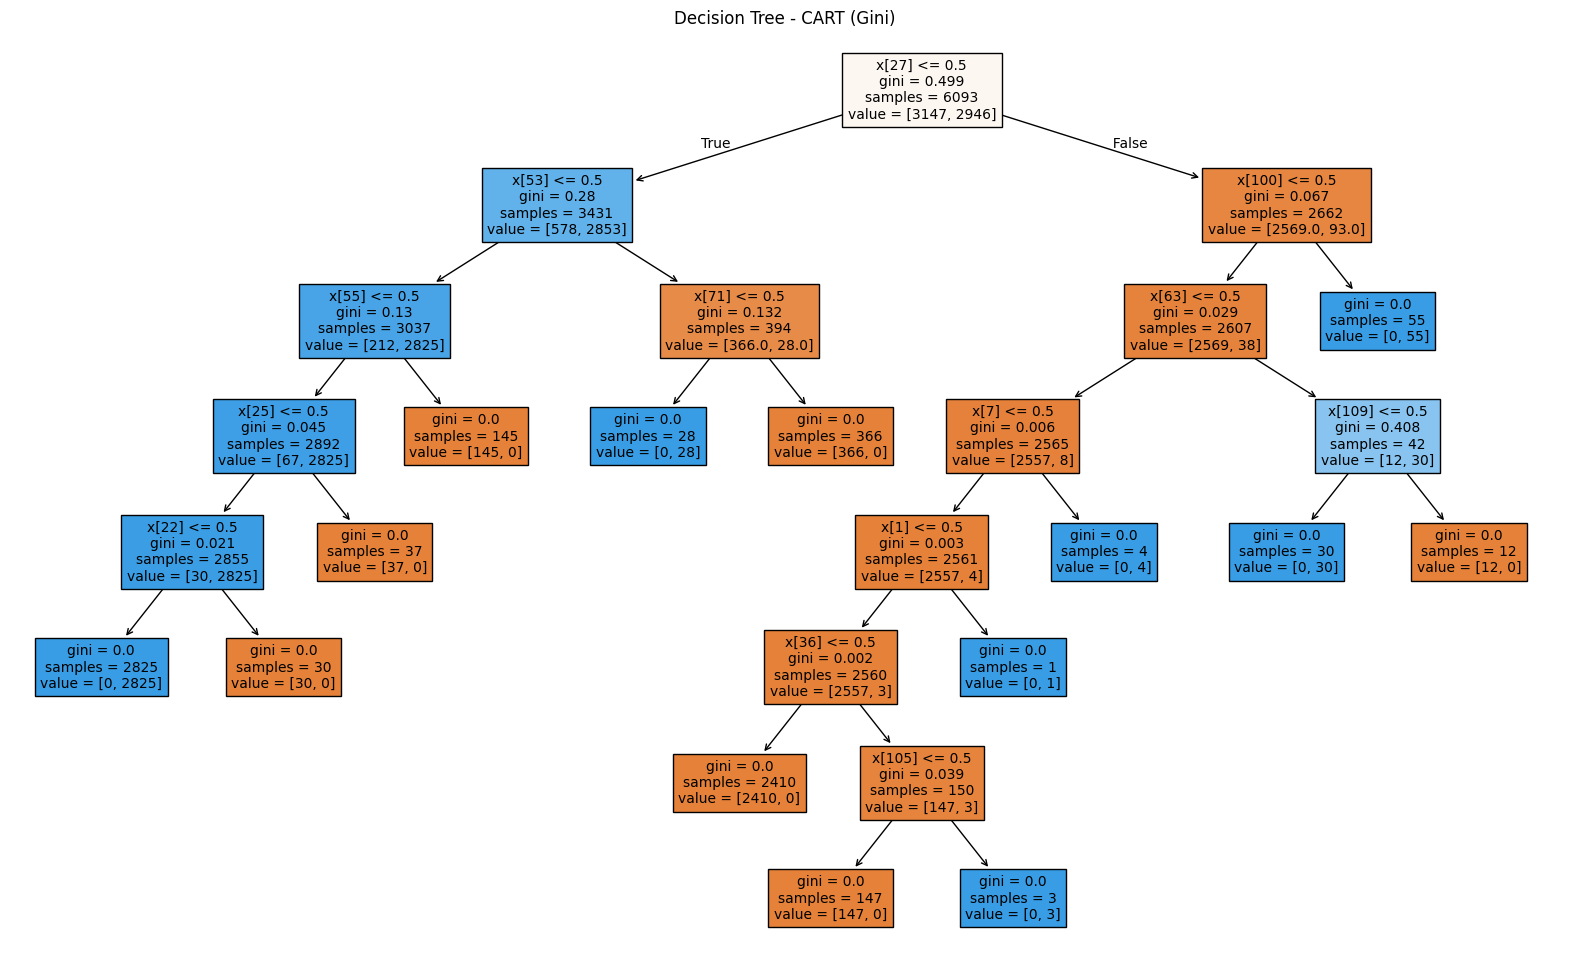

Nguyễn Viết Ái Nhi - 6351071054


In [ ]:
fig, ax = plt.subplots(figsize=(20,12))
tree.plot_tree(clf_cart, filled=True, fontsize=10)
plt.title("Decision Tree - CART (Gini)")
plt.show()
print("Nguyễn Viết Ái Nhi - 6351071054")


**Câu 9**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

# Khởi tạo Gaussian Naive Bayes
gnb = GaussianNB()

# Huấn luyện và dự đoán
bayes_pred = gnb.fit(X_train, y_train).predict(X_test)

print("Nguyễn Viết Ái Nhi - 6351071054")

Nguyễn Viết Ái Nhi - 6351071054


In [ ]:
# Model Accuracy, how often is the classifier correct?
bayes_score = metrics.accuracy_score(y_test, bayes_pred)
print("Accuracy:", bayes_score)
print("Report:", metrics.classification_report(y_test, bayes_pred))
print("Nguyễn Viết Ái Nhi - 6351071054")

Accuracy: 0.96602658788774
Report:               precision    recall  f1-score   support

           e       1.00      0.93      0.97      1061
           p       0.93      1.00      0.97       970

    accuracy                           0.97      2031
   macro avg       0.97      0.97      0.97      2031
weighted avg       0.97      0.97      0.97      2031

Nguyễn Viết Ái Nhi - 6351071054


Nguyễn Viết Ái Nhi - 6351071054


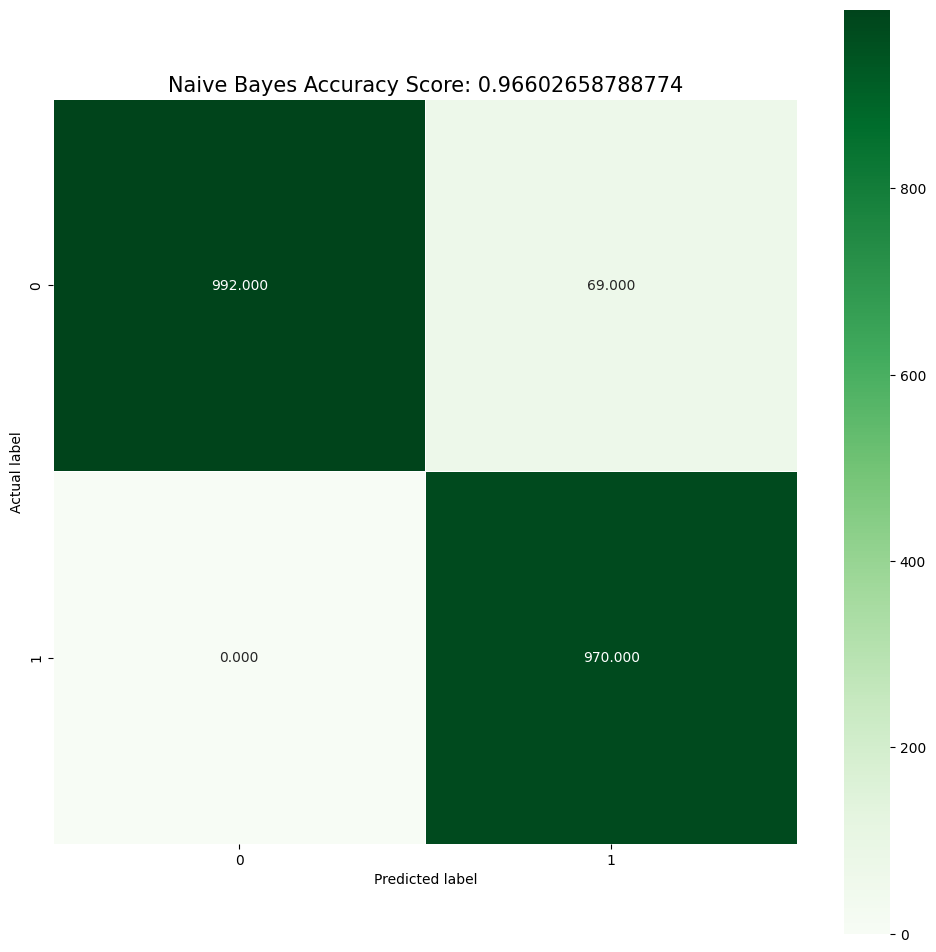

In [ ]:
bayes_cm = metrics.confusion_matrix(y_test, bayes_pred)

plt.figure(figsize=(12,12))
sns.heatmap(bayes_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Greens');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Naive Bayes Accuracy Score: {0}'.format(bayes_score)
plt.title(title, size = 15);
print("Nguyễn Viết Ái Nhi - 6351071054")

**Câu 10**

**ID3 & CART**
| Ma trận nhầm lẫn         | Lớp 0 (Predicted 0)      | Lớp 1 (Predicted 1)      |
|--------------------------|---------------------------|---------------------------|
| Lớp 0 (Actual 0)         | 1061 (True Negative)      | 0 (False Positive)        |
| Lớp 1 (Actual 1)         | 0 (False Negative)        | 970 (True Positive)       |

**Nhận xét:**

* Độ chính xác 100% cho thấy cả hai mô hình đã phân loại đúng tất cả các mẫu trong tập dữ liệu thử nghiệm.
* False Positive (FP) = 0 và False Negative (FN) = 0 là dấu hiệu của một mô hình lý tưởng.
* Trong thực tế, độ chính xác 100% trên tập thử nghiệm thường là dấu hiệu của việc Overfitting (Quá khớp), đặc biệt là với các mô hình cây quyết định không được kiểm soát độ sâu. Điều này có nghĩa là mô hình có thể ghi nhớ tập dữ liệu huấn luyện (hoặc tập dữ liệu thử nghiệm rất giống tập huấn luyện), nhưng có thể không tổng quát hóa tốt cho dữ liệu mới, chưa thấy.

**Navie Bayes**

| Ma trận nhầm lẫn         | Lớp 0 (Predicted 0)      | Lớp 1 (Predicted 1)      |
|--------------------------|---------------------------|---------------------------|
| Lớp 0 (Actual 0)         | 992 (True Negative)       | 69 (False Positive)       |
| Lớp 1 (Actual 1)         | 0 (False Negative)        | 970 (True Positive)       |

**Nhận xét:**

* Mô hình Naive Bayes đạt được độ chính xác rất cao (96.60%).
* Mô hình này phân loại hoàn hảo Lớp 1 (970 True Positive, 0 False Negative) - tức là không bỏ sót bất kỳ mẫu nào thuộc Lớp 1.
* Lỗi duy nhất của mô hình là 69 False Positive, tức là 69 mẫu thuộc Lớp 0 bị dự đoán sai là Lớp 1.

**Kết luận:**

* Về mặt hiệu suất trên tập thử nghiệm: Các mô hình Decision Tree (CART và ID3) là tốt nhất với độ chính xác tuyệt đối 100%.
* Về mặt tổng quát hóa: Độ chính xác 100% của Decision Tree có thể không phản ánh hiệu suất thực tế trên dữ liệu mới. Mô hình Naive Bayes, với độ chính xác 96.60% và chỉ có 69 lỗi False Positive, là một mô hình rất mạnh và đáng tin cậy hơn khi xét đến nguy cơ Overfitting.